In [220]:
import matplotlib.pyplot as plt
import numpy as np

In [221]:
X = [np.random.randint(0, 2, size=5) for _ in range(4)]
X

[array([0, 1, 1, 0, 0], dtype=int32),
 array([0, 1, 1, 1, 1], dtype=int32),
 array([1, 0, 1, 0, 1], dtype=int32),
 array([1, 0, 1, 0, 1], dtype=int32)]

In [222]:
def f(X):
    X_array = np.array(X)
    nv = np.sum(X_array, axis=1)  
    ne = (nv * (nv - 1)) / 2  
    aptitude = ne - 0.5 * nv  
    #print(f'nv ={nv}')
    return aptitude.tolist()

In [223]:
def classer_sur_f_objectif(X):
    fX = f(X)
    X_sorted = [x for _, x in sorted(zip(fX, X), key=lambda pair: pair[0], reverse=True)]
    X[:] = X_sorted

In [224]:
Y = f(X)
Y

[0.0, 4.0, 1.5, 1.5]

In [225]:
classer_sur_f_objectif(X)

In [226]:
Y = f(X)
Y

[4.0, 1.5, 1.5, 0.0]

In [227]:
def selectioner_et_croiser(X):
    y = f(X)  
    # 9ad  y bax mayb9ax fiha ta 9ima saliba
    if min(y) <= 0:
        min_y = min(y)
        y = [val + abs(min_y) + 1 for val in y]
    
    objectif_total = sum(y)
    p = [(val / objectif_total) for val in y]
    
    
    selecting_index_list = np.random.choice(len(X), size=len(X), p=np.array(p))
    X_selected = [X[i] for i in selecting_index_list]
    
    
    F = X_selected.copy()
    for fi in range(0, len(F) - 1, 2): 
        if fi + 1 < len(F): 
            i = np.random.randint(1, len(F[0]) - 1)
           
            F[fi][i:], F[fi + 1][i:] = F[fi + 1][i:], F[fi][i:]

    X[:] = F[:] 
    return F

In [228]:
def mutation_p(X, p=0.25):
    for x in X:
        nb_mutation = int(p * (len(X[0]) - 1))
        for i in range(nb_mutation):
            index_to_mutate = np.random.randint(len(X[0]))
            new_gen = np.random.randint(2)
            x[index_to_mutate] = new_gen
    return X 


In [229]:
def get_objectif_moyen(X):
    Y = f(X)
    return sum(Y)/len(Y)

In [230]:
def display_history(valus):
    n = np.arange(1, len(valus) + 1)
    plt.figure(figsize=(8, 4))
    plt.plot(n, valus, label="Variation du objectif moyenne")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Objectif Moyenne")
    plt.title("Variation du objectif moyenne ou coure de l'avancement")
    plt.show()

In [231]:
def obtimisation_de_sous_graph(X, p_mut_par_bit, n_itr):
    obj_moyen_history = []
    for i in range(n_itr):
        classer_sur_f_objectif(X)
        X_decendants = selectioner_et_croiser(X)
        X[:] = mutation_p(X_decendants, p_mut_par_bit)
        obj_moyen_history.append(get_objectif_moyen(X))
    

    display_history(obj_moyen_history)
    print("Optimization complete!")

In [232]:
X = [np.random.randint(0, 2, size=5) for _ in range(4)]
X

[array([1, 1, 1, 1, 1], dtype=int32),
 array([1, 1, 0, 1, 0], dtype=int32),
 array([0, 1, 1, 0, 1], dtype=int32),
 array([0, 0, 1, 0, 0], dtype=int32)]

In [233]:
Y = f(X)
Y

[7.5, 1.5, 1.5, -0.5]

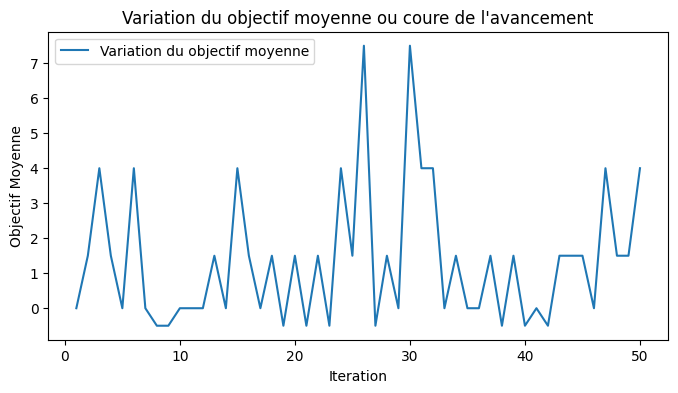

Optimization complete!


In [234]:
X = [np.random.randint(0, 2, size=5) for _ in range(4)]
obtimisation_de_sous_graph(X, 0.25, 50)

In [235]:
X

[array([1, 0, 1, 1, 1], dtype=int32),
 array([1, 0, 1, 1, 1], dtype=int32),
 array([1, 0, 1, 1, 1], dtype=int32),
 array([1, 0, 1, 1, 1], dtype=int32)]